Install necessary python libraries

In [1]:
import sys
!{sys.executable} -m pip install wand

Clone MetOcean storm_surge github repository to /tmp folder

In [2]:
from git import Repo
repo = Repo.clone_from("git@github.com:metocean/storm_surge.git", "/tmp/storm_surge")


Clone and install Calypso Science Toto python library

In [3]:
# Repo.clone_from("git@github.com:calypso-science/Toto.git", "/tmp/Toto")
Repo.clone_from("git@github.com:calypso-science/Toto.git", "/tmp/Toto", branch="storm_surge_project")
!{sys.executable} -m pip install --no-cache-dir -r /tmp/Toto/requirements.txt
!{sys.executable} -m pip install -e /tmp/Toto

  Cloning https://github.com/python-windrose/windrose to /tmp/pip-req-build-dx56jrzb
  Running command git clone -q https://github.com/python-windrose/windrose /tmp/pip-req-build-dx56jrzb
  Resolved https://github.com/python-windrose/windrose to commit 7342238361b28943063b9b9669cb47bc81f568f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/wesleybowman/UTide.git to /tmp/pip-req-build-rk_eznj_
  Running command git clone -q https://github.com/wesleybowman/UTide.git /tmp/pip-req-build-rk_eznj_
  Resolved https://github.com/wesleybowman/UTide.git to commit b2bd8367e132dc896c4a96ff633aeefb45b0a87c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 40 kB 18.0 MB/s eta 0:00:01
  Created wheel for windrose: filename=windrose-1.8.1.dev12+g7342238-py3-none-any.whl size=12261 s

Now we first run the read, clean and plot the LINZ sea level data.

Reading: AUCT_raw.nc
Reading data from sensor 41
Hardcoding reference bench mark = 3.4878
Skipping Mar 2009 - Apr 2009:  zero point drifting     

Skipping Jun 2012 - Aug 2012: sensor faulty            

Skipping Jan 2015 -> zero point drifting, annual variation

Reading data from sensor 40
Hardcoding reference bench mark = 3.4878
Skipping Apr 2009 - Nov 2009: zero point drifting    

Skipping Jun 2012 - Aug 2012: zero point drifting          

Skipping Sep 2017 - Feb 2019: zero point drifting

Skipping Jan 2020 -> zero point drifting

Using sensor 40
Cleaning 
	Fill gap
	Resample to hourly
	Remove spike with phasespace3d
	Remove spike with abs threshold
	Clean manually


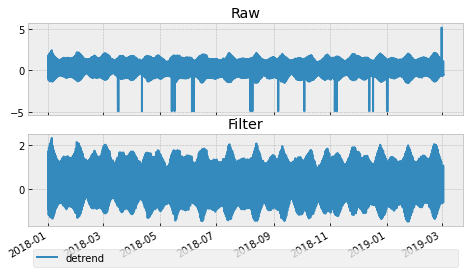

Skipping filtering analysis. Define '-del1' and '-del2' arguments (if wanted)                 and set '-a' to True to do the analysis.
Finished with AUCT_raw.nc


In [4]:
import sys
sys.path.append('/tmp/storm_surge/storm_surge/data_processing/linz_waterlevel')
import LINZ

LINZ.process('/tmp/linz/raw/AUCT', \
    '/tmp/linz/processed/AUCT', \
    True, \
    '/tmp/', \
    [], \
    [], \
    False, \
    True, \
    True, \
    30, \
    40, \
    None, \
    None, \
    False)
# %run /tmp/storm_surge/storm_surge/data_processing/linz_waterlevel/LINZ.py /tmp/linz/raw/WLGT /tmp/linz/processed/WLGT -s 40 -a False

Now that we are happy with the resulting time series, we repeat the same process and perform the analysis - that will split the total signal into components, one of them is the storm surge we are looking for.

Reading: AUCT_raw.nc
Reading data from sensor 41
Hardcoding reference bench mark = 3.4878
Skipping Mar 2009 - Apr 2009:  zero point drifting     

Skipping Jun 2012 - Aug 2012: sensor faulty            

Skipping Jan 2015 -> zero point drifting, annual variation

Reading data from sensor 40
Hardcoding reference bench mark = 3.4878
Skipping Apr 2009 - Nov 2009: zero point drifting    

Skipping Jun 2012 - Aug 2012: zero point drifting          

Skipping Sep 2017 - Feb 2019: zero point drifting

Skipping Jan 2020 -> zero point drifting

Using sensor 40
Cleaning 
	Fill gap
	Resample to hourly
	Remove spike with phasespace3d
	Remove spike with abs threshold
	Clean manually


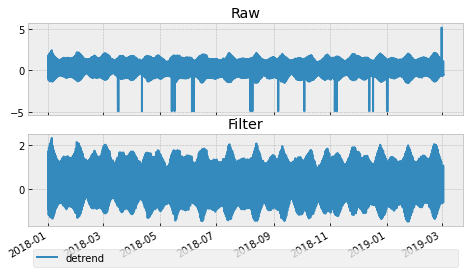

Do the analysis 
	Storing NaNs position
	Filling gap with mean value
	Detrending
	Tidal analysis
{'trend': False, 'constit': 'auto', 'method': 'ols', 'conf_int': 'linear', 'Rayleigh_min': 2}
solve: matrix prep ... solution ... done.
prep/calcs ... done.
	Monthly mean filtering
	Skew surge filtering
prep/calcs ... done.
	Storm surge filtering
Saving log to AUCT_log.pdf
Finished with AUCT_raw.nc


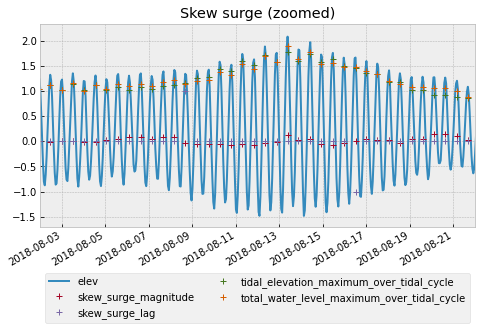

In [5]:
LINZ.process('/tmp/linz/raw/AUCT', \
    '/tmp/linz/processed/AUCT', \
    True, \
    '/tmp/', \
    [], \
    [], \
    False, \
    True, \
    True, \
    30, \
    40, \
    None, \
    None, \
    True)

The resulting pdf log showing all the processing steps performed with the sea level data is shown bellow:

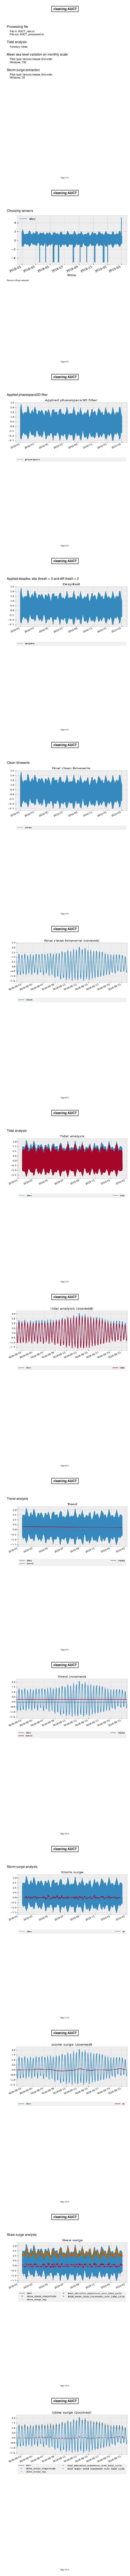

In [6]:
from wand.image import Image

imageFromPdf = Image(filename='/tmp/linz/processed/AUCT/AUCT_log.pdf')
pages = len(imageFromPdf.sequence)  

image = Image(  
  width=imageFromPdf.width,  
  height=imageFromPdf.height * pages  
)  
for i in range(pages):  
  image.composite(  
  imageFromPdf.sequence[i],  
  top=imageFromPdf.height * i,  
  left=0  
)  
image.format="png"  
image 
